In [2]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daphnelee03","key":"4487ad671da4b55e20fe8e45aa639d8e"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

In [5]:
!kaggle datasets download -d jacksoncrow/stock-market-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 99% 519M/522M [00:07<00:00, 56.3MB/s]
100% 522M/522M [00:07<00:00, 74.3MB/s]


In [6]:
import zipfile
import os

# Define the path to the downloaded zip file
zip_file_path = 'stock-market-dataset.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('stock-market-dataset')

# List the files in the directory
os.listdir('stock-market-dataset')

['symbols_valid_meta.csv', 'etfs', 'stocks']

In [24]:
# Define the path to the CSV file
csv_file_path = 'stock-market-dataset/stocks/AMZN.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [25]:
df.shape

(5758, 7)

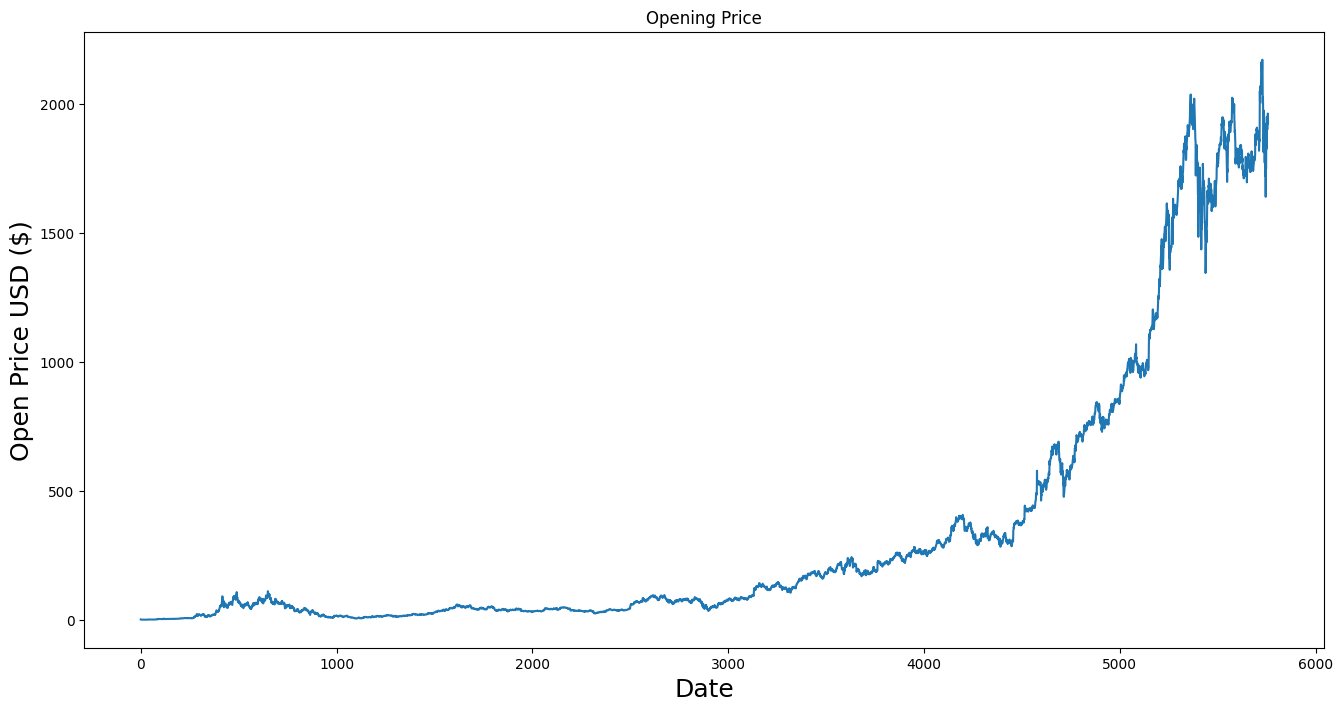

In [26]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Include additional features
df['MA50'] = df['Open'].rolling(window=50).mean()
df['MA200'] = df['Open'].rolling(window=200).mean()

# Drop NaN values created by moving averages
df = df.dropna()

# Filter the relevant columns
data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA50', 'MA200']]
dataset = data.values
# Split the data into training and testing datasets
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

4448

In [28]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [29]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.90533531e-04, 1.76113738e-04, 4.15290748e-05, 3.19158060e-05,
       1.80920482e-04, 2.28986386e-04, 5.60641630e-04, 4.26056967e-04,
       3.01085352e-04, 3.34731463e-04, 3.32328311e-04, 3.39538207e-04,
       3.20311670e-04, 5.55835105e-04, 5.02962457e-04, 4.86139292e-04,
       4.45283284e-04, 5.41415312e-04, 4.16443698e-04, 5.12575726e-04,
       5.75061423e-04, 5.55835105e-04, 5.51028361e-04, 7.76938528e-04,
       9.74008888e-04, 8.97103397e-04, 6.18320802e-04, 5.94287740e-04,
       8.25004432e-04, 9.21136459e-04, 8.82683604e-04, 1.04130155e-03,
       9.69202583e-04, 9.57185942e-04, 9.40362777e-04, 9.35556253e-04,
       8.58650762e-04, 6.18320802e-04, 4.26056967e-04, 4.78929395e-04,
       8.44230969e-04, 1.01246196e-03, 1.02207501e-03, 8.39424225e-04,
       9.25942984e-04, 8.87490349e-04, 8.87490349e-04, 7.72132003e-04,
       7.81745052e-04, 8.46634121e-04, 6.47160389e-04, 7.52905466e-04,
       8.10584638e-04, 8.05778114e-04, 7.33679148e-04, 7.19259355e-04,
     

In [30]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
'''#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape'''

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4388, 60, 1)

In [32]:
'''#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))'''

def create_model():
  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  #model.add(Dropout(0.2))
  model.add(LSTM(50, return_sequences=False))
  #model.add(Dropout(0.2))
  model.add(Dense(160))
  model.add(Dense(1)) #instead of 1
  #Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [34]:
'''#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3, validation_split=0.2)'''
# Set the number of times you want to fit the model
num_trials = 5
best_model = None
best_val_loss = np.inf

# Loop to fit the model multiple times
for i in range(num_trials):
    print(f"Trial {i+1}/{num_trials}")

    currModel = create_model()
    history = currModel.fit(x_train, y_train, batch_size=1, epochs=3, validation_split=0.2)

    # Get the validation loss of the current model
    val_loss = history.history['val_loss'][-1]

    # Check if this model has the best validation loss so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = currModel

# Ensure that the final model is the best model
model = best_model

print("Best validation loss:", best_val_loss)

Trial 1/5
Epoch 1/3
3510/3510 [==============================] - 146s 40ms/step - loss: 3.1163e-05 - val_loss: 1.0983e-04
Epoch 2/3
3510/3510 [==============================] - 137s 39ms/step - loss: 1.4310e-05 - val_loss: 6.3364e-05
Epoch 3/3
3510/3510 [==============================] - 130s 37ms/step - loss: 8.8521e-06 - val_loss: 1.8898e-05
Trial 2/5
Epoch 1/3
3510/3510 [==============================] - 140s 39ms/step - loss: 3.4440e-05 - val_loss: 2.4635e-05
Epoch 2/3
3510/3510 [==============================] - 137s 39ms/step - loss: 1.4049e-05 - val_loss: 2.5320e-04
Epoch 3/3
3510/3510 [==============================] - 134s 38ms/step - loss: 1.0067e-05 - val_loss: 2.8361e-05
Trial 3/5
Epoch 1/3
3510/3510 [==============================] - 146s 40ms/step - loss: 3.5893e-05 - val_loss: 2.3256e-04
Epoch 2/3
3510/3510 [==============================] - 138s 39ms/step - loss: 1.5288e-05 - val_loss: 5.0153e-05
Epoch 3/3
3510/3510 [==============================] - 134s 38ms/step - lo

In [35]:
'''#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])'''

# Create the test data
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, 0]  # Actual 'Open' prices

for i in range(60, len(test_data)):
    #x_test.append(test_data[i-60:i, :])  # Include all features
    x_test.append(test_data[i-60:i, 0])

In [36]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [37]:
'''#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))'''

#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [38]:
'''#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)'''

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions_reshaped = np.zeros((predictions.shape[0], dataset.shape[1]))
predictions_reshaped[:, 0] = predictions[:, 0]  # Fill in the 'Open' price predictions

# Inverse transform the reshaped predictions
predictions = scaler.inverse_transform(predictions_reshaped)[:, 0] # Extract 'Open' price predictions

35/35 [==============================] - 2s 19ms/step


In [39]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.3828850522937306

<ipython-input-40-4278c077e42c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


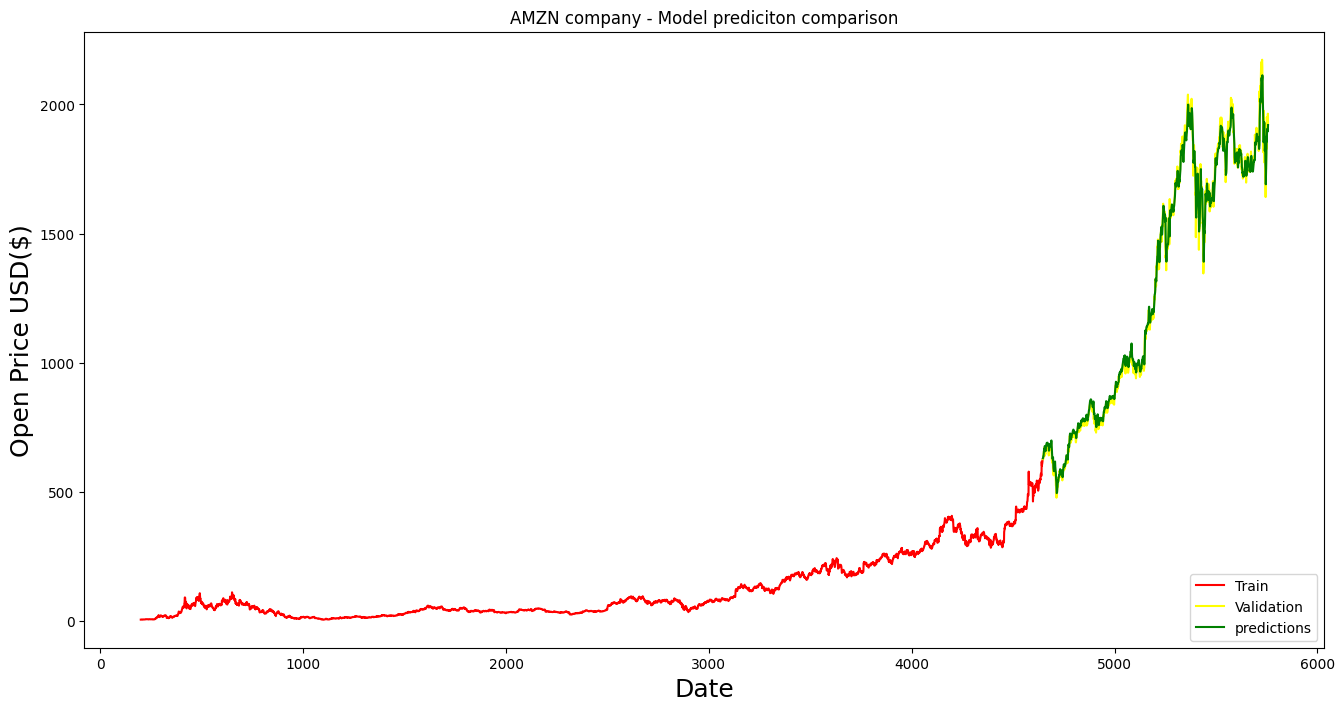

In [40]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('AMZN company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()

In [41]:
#Show the valid and predicted prices

valid.tail(15)

,Open,High,Low,Close,Volume,MA50,MA200,predictions
5743,1721.979980,1765.000000,1675.000000,1676.609985,11346200,1951.227598,1851.584601,1840.720581
5744,1755.000000,1786.310059,1680.619995,1785.000000,8809700,1949.487598,1851.244001,1775.885262
5745,1641.510010,1759.449951,1626.030029,1689.150024,8917300,1944.817798,1850.324102,1754.302811
5746,1775.469971,1857.780029,1689.239990,1807.839966,10917100,1943.037197,1850.251401,1691.044950
5747,1750.000000,1841.660034,1745.000000,1830.000000,9645200,1940.837197,1850.201351,1728.069364
5748,1860.000000,1945.000000,1832.650024,1880.930054,10399900,1939.947197,1851.005151,1745.282674
5749,1926.310059,1957.000000,1820.729980,1846.089966,9817900,1940.512598,1851.888702,1808.410974
5750,1827.750000,1919.400024,1812.000000,1902.829956,7808500,1938.869797,1852.338902,1876.341403
5751,1951.500000,1955.000000,1900.339966,1940.099976,7147100,1939.792397,1853.277902,1856.379554
5752,1920.689941,1950.260010,1885.780029,1885.839966,6479100,1940.379995,1853.771352,1897.016544


In [77]:
#Get the quote
#stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')
stock_quote=df;
#data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA50', 'MA200']]

new_df = stock_quote.filter(['Open', 'High', 'Low', 'Close', 'Volume', 'MA50', 'MA200']) # Assuming these were your original features
#Get last 60 days values and convert into array
last_60_days=new_df[-360:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)


# Select only the 'Open' price feature (index 0)
X_test = X_test[:,:,0]


#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
pred_price_reshaped_next = pred_price
# Reshape pred_price before inverse transforming
pred_price_reshaped = np.zeros((pred_price.shape[0], dataset.shape[1])) # Assuming 'dataset' is available and has the original number of features
pred_price_reshaped[:, 0] = pred_price[:, 0]

#undo the scaling
pred_price=scaler.inverse_transform(pred_price_reshaped)[:, 0] # Extract the 'Open' price after inverse transform
print(f'Opening Price of AMZN tomorrow:{pred_price}')




1/1 [==============================] - 0s 83ms/step
Opening Price of AMZN tomorrow:[1916.50071151]


In [78]:
NextMonthPredictions = []
date = df['Date'][-1:]
print(date)
print(date.shape)
for i in range(90):

  pred_price_reshaped_next = pred_price_reshaped_next.reshape(1, 1, 1)
  new_data = np.concatenate((X_test[:, 1:, :], pred_price_reshaped_next), axis=1)

  pred_price = model.predict(new_data)
  pred_price_reshaped_next = pred_price
  # Reshape pred_price before inverse transforming
  pred_price_reshaped = np.zeros((pred_price.shape[0], dataset.shape[1])) # Assuming 'dataset' is available and has the original number of features
  pred_price_reshaped[:, 0] = pred_price[:, 0]
  #undo the scaling
  pred_price=scaler.inverse_transform(pred_price_reshaped)[:, 0] # Extract the 'Open' price after inverse transform

  #print(new_data)
  last_100_predictions = new_data[0,:,0] #Extract all predicted values
  x_trend = np.arange(len(last_100_predictions))  # Use the length of predictions for the x-axis
  regressor = LinearRegression()
  regressor.fit(x_trend.reshape(-1, 1), last_100_predictions)
  #trend = regressor.predict(x_trend.reshape(-1, 1))
  next_day = np.array([[len(last_100_predictions)]]) #Predict the next day
  predicted_next_value_scaled = regressor.predict(next_day)
  predicted_next_value_reshaped = np.zeros((1, dataset.shape[1]))
  predicted_next_value_reshaped[:, 0] = predicted_next_value_scaled
  predicted_next_value = scaler.inverse_transform(predicted_next_value_reshaped)[0, 0]
  print(f"lin reg: {predicted_next_value}")
  print(f'Opening Price of AMZN day after tomorrow:{pred_price}')
  combined_pred = (pred_price + predicted_next_value) / 2
  print(f'combined predict {combined_pred}')

5757    2020-04-01
Name: Date, dtype: object
(1,)
1/1 [==============================] - 0s 55ms/step
lin reg: 1941.863919982573
Opening Price of AMZN day after tomorrow:[1903.41770219]
combined predict [1922.64081109]
1/1 [==============================] - 0s 62ms/step
lin reg: 1941.718553212399
Opening Price of AMZN day after tomorrow:[1896.77860748]
combined predict [1919.24858034]
1/1 [==============================] - 0s 66ms/step
lin reg: 1941.6447854933676
Opening Price of AMZN day after tomorrow:[1893.40448461]
combined predict [1917.52463505]
1/1 [==============================] - 0s 59ms/step
lin reg: 1941.6072952392906
Opening Price of AMZN day after tomorrow:[1891.68906975]
combined predict [1916.64818249]
1/1 [==============================] - 0s 57ms/step
lin reg: 1941.5882350741301
Opening Price of AMZN day after tomorrow:[1890.81689496]
combined predict [1916.20256502]
1/1 [==============================] - 0s 50ms/step
lin reg: 1941.5785442431693
Opening Price of AMZN 

<ipython-input-63-653401166d46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


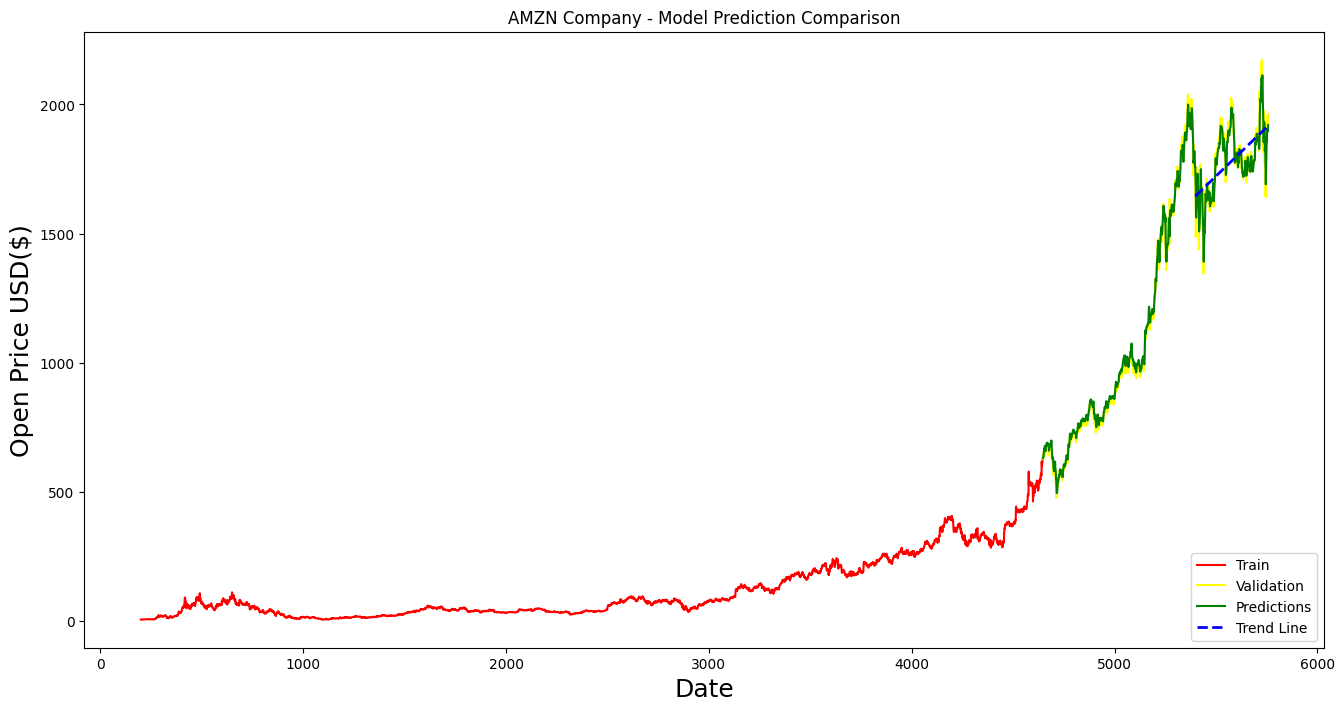

In [63]:
from sklearn.linear_model import LinearRegression

# Visualizing the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

# Fit a trend line to the actual 'Open' prices in the validation set starting from the prediction start
'''trend_start_idx = 60  # Since predictions start at index 60 of the validation data
x_trend = np.arange(len(valid) - trend_start_idx)
regressor = LinearRegression()
regressor.fit(x_trend.reshape(-1, 1), valid['Open'].iloc[trend_start_idx:])
trend = regressor.predict(x_trend.reshape(-1, 1))'''

# Fit a trend line to the last 100 days of predictions
last_100_predictions = predictions[-360:]
x_trend = np.arange(360)  # Use last 100 days for the x-axis
regressor = LinearRegression()
regressor.fit(x_trend.reshape(-1, 1), last_100_predictions)
trend = regressor.predict(x_trend.reshape(-1, 1))

plt.figure(figsize=(16,8))
plt.title('AMZN Company - Model Prediction Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'], color='red')
plt.plot(valid['Open'], color='yellow')
plt.plot(valid['predictions'], color='green')
plt.plot(valid.index[-360:], trend, color='blue', linestyle='--', linewidth=2)

plt.legend(['Train', 'Validation', 'Predictions', 'Trend Line'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()
